<a href="https://colab.research.google.com/github/egioia92/Google-Collab-Repository/blob/main/Multiple_Linear_Regression_Case_Study_Boston_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Linear Regression Case Study: Boston Housing Prices

##Background
The data has 506 cases where each case is a location in Boston.

##Data
The “median housing price” is a target variable. The data has many other variables related to environment,education,,crime etc. which can influence the housing prices in the specific location

##Objective
The objective is to identify significant factors affecting housing prices


## Import data and display first 6 rows

In [ ]:
import pandas as pd
boston = pd.read_csv('/content/Housing Prices.csv')
boston.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


##Correlation matrix using heatmap

<Axes: >

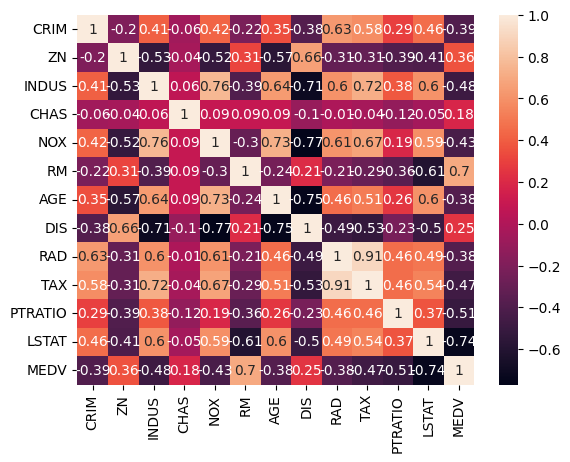

In [ ]:
#understand the correllation between the variables via heatmap
import seaborn as sns
# computer pearson correlation and round the resault to be 2 decimal?
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

#i.e. crime rate has a negative impact on the final price
# indication of how much the variable affect the final price and how they are correlated to each other


## Check for multicollinearity using vif

In [ ]:
#let's check for the multiple linearity issue
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#we want to use only the indipend variables MEDV tilda all the indipenedt variables
y, X = dmatrices('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+LSTAT', data=boston, return_type="dataframe")
# y
# X we are inderested in this (the indipended variables). X has multiple column (crim, zn,..) x1, x2, x3,
# i goes from the X.shape[1]=first column (0), till the end X.columns

#we get the vif values. vif > 5 means multilinearity.
# We drop TAX and ricalculate the vif

vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
vif


Intercept    535.526619
CRIM           1.767486
ZN             2.298459
INDUS          3.987181
CHAS           1.071168
NOX            4.369093
RM             1.912532
AGE            3.088232
DIS            3.954037
RAD            7.445301
TAX            9.002158
PTRATIO        1.797060
LSTAT          2.870777
dtype: float64

In [ ]:
#we get the vif values. vif > 5 means multilinearity.
# We drop TAX and ricalculate the vif
boston = boston.drop(columns=['TAX'])
boston.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,18.7,5.21,28.7


In [ ]:
#repeat vif

y, X = dmatrices('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+PTRATIO+LSTAT', data=boston, return_type="dataframe")

vif = pd.Series([variance_inflation_factor(X.values, i)for i in range(X.shape[1])],index=X.columns)
vif

#all variable are now less than 5 so there is no multilinearity issue anymore

Intercept    529.480235
CRIM           1.767349
ZN             2.184172
INDUS          3.217951
CHAS           1.055023
NOX            4.343300
RM             1.902642
AGE            3.085756
DIS            3.952445
RAD            2.772208
PTRATIO        1.787049
LSTAT          2.870408
dtype: float64

##Develop Housing Prices Model using Linear Regression

###Split original data into training and testing data sets

In [ ]:
# let's create a model now

from sklearn.model_selection import train_test_split

boston_train, boston_test = train_test_split(boston, test_size = 0.2, random_state=42) #42 is a random number for sampling

In [ ]:
boston_train.shape

(404, 12)

In [ ]:
boston_test.shape

(102, 12)

###Running Linear Regression model using OLS function from statsmodels library

In [ ]:
# let's create the linear regression model
# It provides a number of statistical models, include ols, ordinary least squares, i.e. linear regression.
import statsmodels.formula.api as smf
hp_model = smf.ols('MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+PTRATIO+LSTAT',data=boston_train).fit()

###Displaying model summary

In [ ]:
print(hp_model.summary())
# all the P values greater then 0.05 are meaningless so we are going to delete them from the model

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     98.99
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          7.75e-106
Time:                        18:21:42   Log-Likelihood:                -1206.6
No. Observations:                 404   AIC:                             2437.
Df Residuals:                     392   BIC:                             2485.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.2203      5.555      6.340      0.0

Comment: From the model summary, it can be seen that the variables ZN, INDUS,RAD and AGE are insignificant(since p value > 0.05), so we remove them from the model and run the model again.

In [ ]:
hp_model = smf.ols('MEDV~CRIM+CHAS+NOX+RM+DIS+PTRATIO+LSTAT',data=boston_train).fit()
print(hp_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          6.26e-109
Time:                        18:27:42   Log-Likelihood:                -1209.4
No. Observations:                 404   AIC:                             2435.
Df Residuals:                     396   BIC:                             2467.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.8452      5.073      6.278      0.0

###Plot of Residuals vs Predicted values

<Axes: xlabel='pred', ylabel='res'>

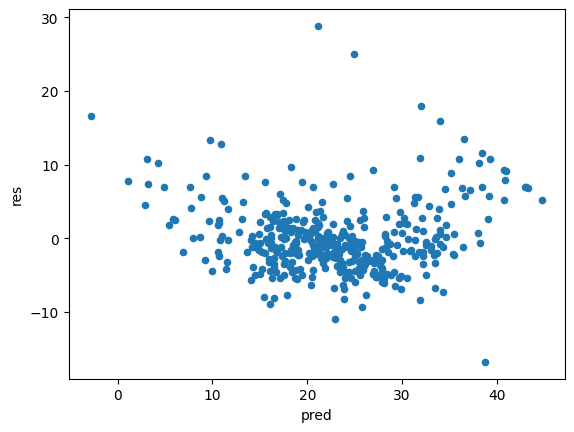

In [ ]:
# now we have all the meaningfull variables
boston_train['pred'] = hp_model.predict(boston_train)
boston_train['res']= hp_model.resid

#we want to see that the residual are completely random
boston_train.plot.scatter(x='pred', y='res')

#we can see they are random. Comment: It is observed that residuals are randomly distributed and uncorelated with predicted values

Comment: It is observed that residuals are randomly distributed and uncorelated with predicted values

###Check if distribution of errors is “NORMAL”

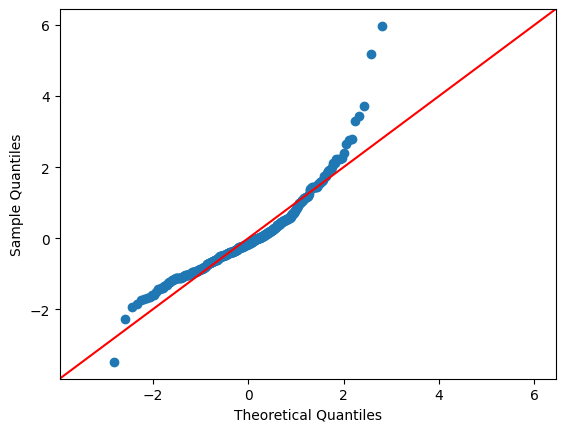

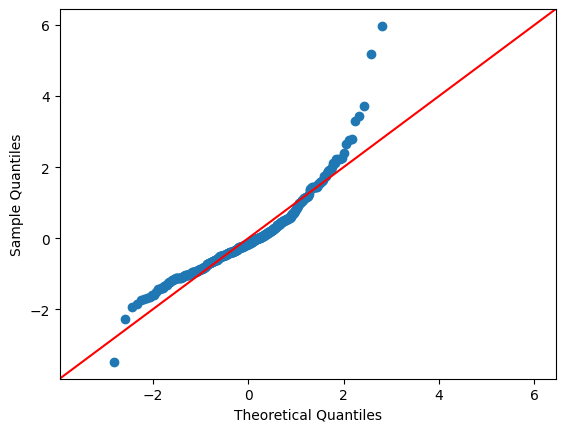

In [ ]:
#Check if distribution of errors is “NORMAL”
import statsmodels.api as sm
sm.graphics.qqplot(boston_train.res, line='45', fit=True)

In [ ]:
import scipy as sp
sp.stats.shapiro(boston_train.res)
#Comment: Although normality of errors is not established we will proceed to evaluate the model performance
#shapirto is less than 0.05
# we are going ahead becouse majory of the res are linear?

ShapiroResult(statistic=0.9116807579994202, pvalue=1.2912867356060145e-14)

###Model Validation: Holdout Method using RMSE

In [ ]:
#Model Validation: Holdout Method using RMSE
# calculate the rmse and r2 for the train data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

rmse = (np.sqrt(mean_squared_error(boston_train['MEDV'], boston_train['pred'])))
r2 = r2_score(boston_train['MEDV'], boston_train['pred']) # r square values

print('RMSE is {}'.format(rmse))

RMSE is 4.828905476132975


In [ ]:
print('R2 score is {}'.format(r2))

R2 score is 0.7315826585744917


In [ ]:
# calculate the rmse and r2 for the test data
y_test_predict = hp_model.predict(boston_test)
rmse = (np.sqrt(mean_squared_error(boston_test['MEDV'], y_test_predict)))
r2 = r2_score(boston_test['MEDV'], y_train_predict)

print('RMSE is {}'.format(rmse))

RMSE is 5.104988833926636


In [ ]:
print('R2 score is {}'.format(r2))

R2 score is 0.6446261208488175


In [ ]:
# the values are comparable so the model is good

### K-fold cross validation

In [ ]:
#K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

Y = boston['MEDV']
X = boston.drop(labels=['MEDV', 'ZN', 'INDUS', 'RAD', 'AGE' ], axis=1)

hp_model2 = LinearRegression()

folds = KFold(n_splits = 4, shuffle = True, random_state = 100)
scores = cross_val_score(hp_model2, X, Y, scoring='r2', cv=folds)


print("Mean 4-Fold R Squared: {}".format(np.mean(scores)))

Mean 4-Fold R Squared: 0.7073913275172319


What Is A CVRMSE Value?
CVRMSE is an acronym for Coefficient of the Variation of the Root Mean Square Error.  The CVRMSE is used to calibrate models in measured building performance.  This is a metric that indicates instability in the observed relationship between variables in the baseline period.  It is the coefficient of the variation of the predicted input series relative to the observed input series.

In [ ]:
cv_rmse_scores= cross_val_score(hp_model2, X, Y, cv=folds, scoring='neg_mean_squared_error')
np.sqrt(-(np.mean(cv_rmse_scores))) #RMSE the minus is used to invert the sign of the mean value before taking the square root.

4.971825927756833

Comment: RMSE and R squared values using K-fold validation are similar to overall RMSE and R squared values
The model can be implemented for decision making